🧩 Minimundo 15 — Risco Cardíaco em Pacientes (Saúde)

Contexto: Um hospital quer prever risco cardíaco com base em pressão, colesterol e idade.

Tarefas:
- Calcular correlação entre variáveis.
- Gerar gráfico de dispersão (colesterol × pressão).
- Criar mapa de calor de correlação.

Bibliotecas sugeridas: Pandas, Seaborn, Scikit-learn

Arquivo: risco_cardiaco.csv

=== ANÁLISE DE RISCO CARDÍACO ===

Dados dos pacientes:
 paciente  idade  colesterol  pressao  risco
        1     45         220      140      1
        2     38         180      125      0
        3     50         260      155      1
        4     29         170      110      0

--- MATRIZ DE CORRELAÇÃO ---
            idade  colesterol  pressao  risco
idade       1.000       0.939    0.992  0.887
colesterol  0.939       1.000    0.973  0.912
pressao     0.992       0.973    1.000  0.894
risco       0.887       0.912    0.894  1.000


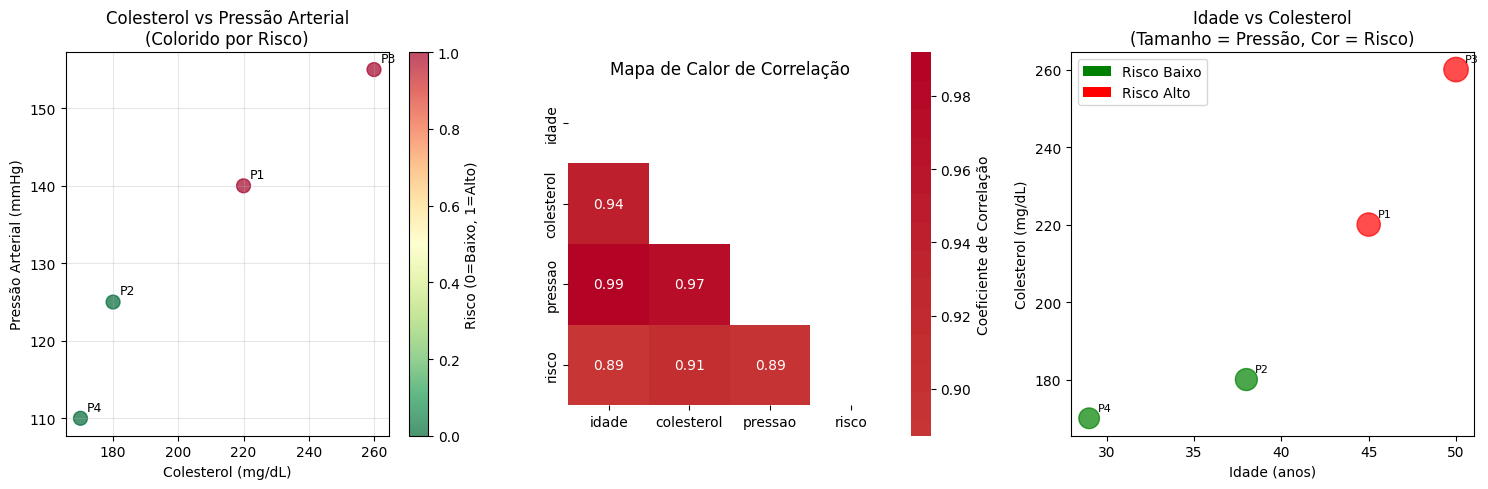


--- ANÁLISE ESTATÍSTICA DETALHADA ---

Médias por grupo de risco:
            Risco Baixo (n=2)  Risco Alto (n=2)  Diferença Absoluta
idade                    33.5              47.5                14.0
colesterol              175.0             240.0                65.0
pressao                 117.5             147.5                30.0

--- MODELO PREDITIVO SIMPLES ---

Importância das variáveis no modelo preditivo:
     Variável  Coeficiente  Importância Absoluta
1  colesterol     0.591652              0.591652
2     pressao     0.543081              0.543081
0       idade     0.542297              0.542297


/tmp/ipykernel_58886/1311985962.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Coeficiente', y='Variável', palette='viridis')


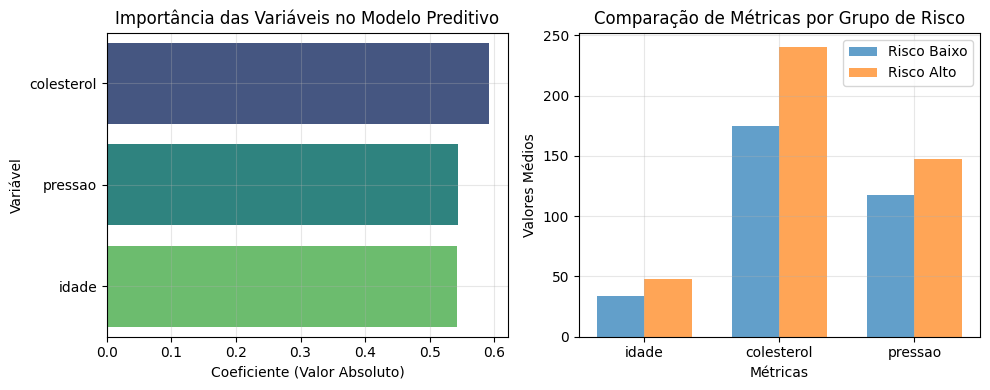


FATOR MAIS IMPORTANTE:
   - COLESTEROL é a variável mais importante no modelo preditivo


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Carregar os dados
df = pd.read_csv('dados/risco_cardiaco.csv')

print("=== ANÁLISE DE RISCO CARDÍACO ===\n")
print("Dados dos pacientes:")
print(df.to_string(index=False))

# 1. Calcular correlação entre variáveis
correlation_matrix = df[['idade', 'colesterol', 'pressao', 'risco']].corr()

print("\n--- MATRIZ DE CORRELAÇÃO ---")
print(correlation_matrix.round(3))

# 2. Gráfico de dispersão (colesterol × pressão) com risco
plt.figure(figsize=(15, 5))

# Gráfico 1: Dispersão colorido por risco
plt.subplot(1, 3, 1)
scatter = plt.scatter(df['colesterol'], df['pressao'], 
                     c=df['risco'], cmap='RdYlGn_r', s=100, alpha=0.7)
plt.colorbar(scatter, label='Risco (0=Baixo, 1=Alto)')
plt.xlabel('Colesterol (mg/dL)')
plt.ylabel('Pressão Arterial (mmHg)')
plt.title('Colesterol vs Pressão Arterial\n(Colorido por Risco)')
plt.grid(True, alpha=0.3)

# Adicionar rótulos dos pontos
for i, row in df.iterrows():
    plt.annotate(f"P{row['paciente']}", 
                (row['colesterol']+2, row['pressao']+1), 
                fontsize=9)

# 3. Mapa de calor de correlação
plt.subplot(1, 3, 2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mascarar triângulo superior
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            mask=mask,
            cbar_kws={'label': 'Coeficiente de Correlação'})
plt.title('Mapa de Calor de Correlação')

# 4. Gráfico adicional: Dispersão 3D interativo (idade × colesterol × pressão)
plt.subplot(1, 3, 3)
colors = ['green' if r == 0 else 'red' for r in df['risco']]
scatter = plt.scatter(df['idade'], df['colesterol'], 
                     s=df['pressao']*2,  # Tamanho proporcional à pressão
                     c=colors, alpha=0.7)
plt.xlabel('Idade (anos)')
plt.ylabel('Colesterol (mg/dL)')
plt.title('Idade vs Colesterol\n(Tamanho = Pressão, Cor = Risco)')

# Adicionar legenda manual para risco
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', label='Risco Baixo'),
    Patch(facecolor='red', label='Risco Alto')
]
plt.legend(handles=legend_elements)

# Adicionar rótulos
for i, row in df.iterrows():
    plt.annotate(f"P{row['paciente']}", 
                (row['idade']+0.5, row['colesterol']+2), 
                fontsize=8)

plt.tight_layout()
plt.show()

# Análise estatística detalhada
print("\n--- ANÁLISE ESTATÍSTICA DETALHADA ---")

# Separar grupos por risco
risco_baixo = df[df['risco'] == 0]
risco_alto = df[df['risco'] == 1]

print("\nMédias por grupo de risco:")
stats_comparison = pd.DataFrame({
    'Risco Baixo (n=2)': risco_baixo[['idade', 'colesterol', 'pressao']].mean(),
    'Risco Alto (n=2)': risco_alto[['idade', 'colesterol', 'pressao']].mean(),
    'Diferença Absoluta': (risco_alto[['idade', 'colesterol', 'pressao']].mean() - 
                          risco_baixo[['idade', 'colesterol', 'pressao']].mean())
})
print(stats_comparison.round(1))

# 5. Modelo preditivo simples (apenas para demonstração)
print("\n--- MODELO PREDITIVO SIMPLES ---")

# Preparar dados para o modelo
X = df[['idade', 'colesterol', 'pressao']]
y = df['risco']

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Treinar modelo de regressão logística
model = LogisticRegression()
model.fit(X_scaled, y)

# Coeficientes do modelo
feature_importance = pd.DataFrame({
    'Variável': ['idade', 'colesterol', 'pressao'],
    'Coeficiente': model.coef_[0],
    'Importância Absoluta': np.abs(model.coef_[0])
}).sort_values('Importância Absoluta', ascending=False)

print("\nImportância das variáveis no modelo preditivo:")
print(feature_importance)

# 6. Gráfico de barras da importância das variáveis
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.barplot(data=feature_importance, x='Coeficiente', y='Variável', palette='viridis')
plt.title('Importância das Variáveis no Modelo Preditivo')
plt.xlabel('Coeficiente (Valor Absoluto)')
plt.grid(True, alpha=0.3)

# Gráfico de valores médios por risco
plt.subplot(1, 2, 2)
metrics = ['idade', 'colesterol', 'pressao']
risco_baixo_means = risco_baixo[metrics].mean()
risco_alto_means = risco_alto[metrics].mean()

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, risco_baixo_means, width, label='Risco Baixo', alpha=0.7)
plt.bar(x + width/2, risco_alto_means, width, label='Risco Alto', alpha=0.7)

plt.xlabel('Métricas')
plt.ylabel('Valores Médios')
plt.title('Comparação de Métricas por Grupo de Risco')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nFATOR MAIS IMPORTANTE:")
fator_mais_importante = feature_importance.iloc[0]['Variável']
print(f"   - {fator_mais_importante.upper()} é a variável mais importante no modelo preditivo")